# KNN Regression

## Importing the data

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
#Reading a csv file
df = pd.read_csv('bigmart_cleaned.csv')

In [3]:
#Dimension of the dataframe
df.shape

(8523, 46)

In [4]:
#First 10 rows of the dataframe
df.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5,10.395,0.000000,51.4008,2009,556.6088,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
6,13.650,0.012741,57.6588,1987,343.5528,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
7,0.000,0.127470,107.7622,1985,4022.7636,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
8,16.200,0.016687,96.9726,2002,1076.5986,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
9,19.200,0.094450,187.8214,2007,4710.5350,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [5]:
#Data type of all columns
df.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Item_Fat_Content_LF                  int64
Item_Fat_Content_Low Fat             int64
Item_Fat_Content_Regular             int64
Item_Fat_Content_low fat             int64
Item_Fat_Content_reg                 int64
Item_Type_Baking Goods               int64
Item_Type_Breads                     int64
Item_Type_Breakfast                  int64
Item_Type_Canned                     int64
Item_Type_Dairy                      int64
Item_Type_Frozen Foods               int64
Item_Type_Fruits and Vegetables      int64
Item_Type_Hard Drinks                int64
Item_Type_Health and Hygiene         int64
Item_Type_Household                  int64
Item_Type_Meat                       int64
Item_Type_Others                     int64
Item_Type_Seafood                    int64
Item_Type_S

In [6]:
#Checking for a missing values
df.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Outlet_Sales                  0
Item_Fat_Content_LF                0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
O

## Segragating variables : Independent and Dependent variables

In [7]:
#Seperating Independent and Dependent variables
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

## Scaling the data (Using MinMaxScaler)

In [8]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [9]:
#First 5 rows after scaling
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.435597,0.048866,0.927507,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.277283,0.058705,0.072068,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.819672,0.051037,0.468288,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.899297,0.000000,0.640093,0.541667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.418267,0.000000,0.095805,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Splitting the dataset into Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

## Implementing KNN Regressor

In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [12]:
#Creating an instance of KNN Regressor
knn = KNeighborsRegressor(n_neighbors=3)

In [13]:
#Fitting the model to the training data
knn.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

## Making Predictions

In [14]:
y_pred = knn.predict(X_test)

## Evaluate the model

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))
print("R2-Score : ", r2_score(y_test, y_pred))

Mean Squared Error :  795494.9922746732
R2-Score :  0.7328563269239726


## Using an Elbow method to find optimum value of K

In [17]:
#Create a function which runs on every value of K and calculate an error
def elbow(k):
    #Creating an empty list in ordet to store error values
    test_mse = []
    
    #Train a model for every value of K
    for i in k:
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train, y_train)
        temp = knn.predict(X_test)
        error = mean_squared_error(y_test, temp)
        test_mse.append(error)
    return test_mse

In [18]:
#Defining K range
k = range(1, 30)

In [19]:
#Calling an elbow method for a range of k values
test = elbow(k)

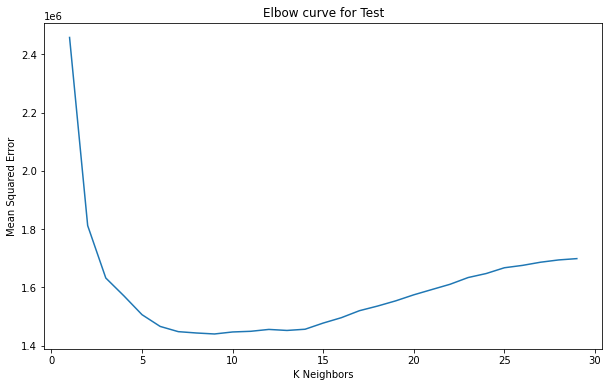

In [20]:
#Plotting an elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error')
plt.title('Elbow curve for Test')
plt.show()

We can see that we got minimum error at 8. So we will create a KNN model by setting n_neighbors=8.

In [21]:
#Creating an instance of knn 
knn = KNeighborsRegressor(n_neighbors=8)

In [22]:
#Fitting the model to the Train data
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [23]:
#Make predictions for Test data
y_pred = knn.predict(X_test)

In [24]:
#Evaluate the model
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))
print("R2 Score : ", r2_score(y_test, y_pred))

Mean Squared Error :  1443093.0057889097
R2 Score :  0.5153795185379848
